In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

from itertools import product
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes Classifier
from sklearn.svm import SVC, LinearSVC # Import SVM Classifier
from sklearn.neighbors import KNeighborsClassifier # Import KNN Classifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from pprint import pprint
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from prettytable import PrettyTable
from scipy import stats
from matplotlib.pyplot import pie, axis, show
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, SelectFromModel, RFE
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from helpers import Trainer, plot_conf_mat, plot_roc, plot_roc_avg, plot_pie_chart, stats_test

random.seed(0)

In [2]:
X_cs_10 = np.load('npy_data/X_combinedSampling_10Features_task2.npy')
y_cs_10 = np.load('npy_data/y_combinedSampling_10Features_task2.npy')
print('X_cs_10.shape, y_cs_10.shape', X_cs_10.shape, y_cs_10.shape)

X_cs_15 = np.load('npy_data/X_combinedSampling_15Features_task2.npy')
y_cs_15 = np.load('npy_data/y_combinedSampling_15Features_task2.npy')
print('X_cs_15.shape, y_cs_15.shape', X_cs_15.shape, y_cs_15.shape)

X_cs_25 = np.load('npy_data/X_combinedSampling_25Features_task2.npy')
y_cs_25 = np.load('npy_data/y_combinedSampling_25Features_task2.npy')
print('X_cs_25.shape, y_cs_25.shape', X_cs_25.shape, y_cs_25.shape)

X_cs_all = np.load('npy_data/X_combinedSampling_AllFeatures_task2.npy')
y_cs_all = np.load('npy_data/y_combinedSampling_AllFeatures_task2.npy')
print('X_cs_all.shape, y_cs_all.shape', X_cs_all.shape, y_cs_all.shape)

classes = ['Female', 'Male']

X_cs_10.shape, y_cs_10.shape (22539, 10) (22539,)
X_cs_15.shape, y_cs_15.shape (22267, 15) (22267,)
X_cs_25.shape, y_cs_25.shape (22820, 25) (22820,)
X_cs_all.shape, y_cs_all.shape (22702, 45) (22702,)


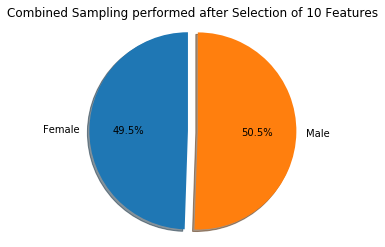

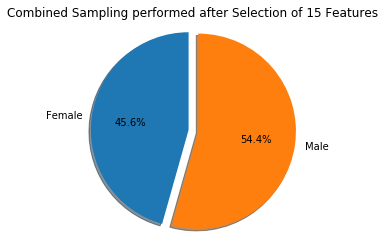

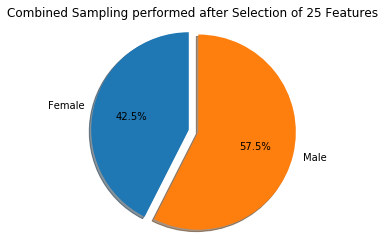

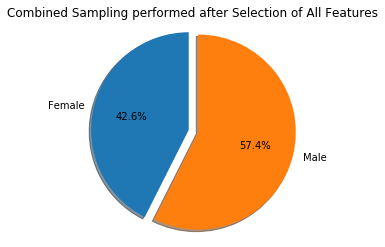

In [3]:
plot_pie_chart(classes, y_cs_10, 10)
plot_pie_chart(classes, y_cs_15, 15)
plot_pie_chart(classes, y_cs_25, 25)
plot_pie_chart(classes, y_cs_all, 'All')

In [4]:
kfold = StratifiedKFold(10, random_state=False, shuffle=True)

folds_10 = kfold.split(X_cs_10, y_cs_10)
folds_10 = [(train, test) for train, test in folds_10]

folds_15 = kfold.split(X_cs_15, y_cs_15)
folds_15 = [(train, test) for train, test in folds_15]

folds_25 = kfold.split(X_cs_25, y_cs_25)
folds_25 = [(train, test) for train, test in folds_25]

folds_all = kfold.split(X_cs_all, y_cs_all)
folds_all = [(train, test) for train, test in folds_all]

In [5]:
data_classes_10  = []
data_classes_15  = []
data_classes_25  = []
data_classes_all = []

for i in range(2):
    data_classes_10.append(len(y_cs_10[y_cs_10==i]))
for i in range(2):
    data_classes_15.append(len(y_cs_15[y_cs_15==i]))
for i in range(2):
    data_classes_25.append(len(y_cs_25[y_cs_25==i]))
for i in range(2):
    data_classes_all.append(len(y_cs_all[y_cs_all==i]))

In [6]:
trainer10 = Trainer(X=X_cs_10, y=y_cs_10, folds=folds_10, 
                  data_classes=data_classes_10, classes=classes)

trainer15 = Trainer(X=X_cs_15, y=y_cs_15, folds=folds_15, 
                  data_classes=data_classes_15, classes=classes)

trainer25 = Trainer(X=X_cs_25, y=y_cs_25, folds=folds_25, 
                  data_classes=data_classes_25, classes=classes)

trainerAll = Trainer(X=X_cs_all, y=y_cs_all, folds=folds_all, 
                  data_classes=data_classes_all, classes=classes)

----------------10 Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         1.2205        |
|    Accuracy   |   0.7435997394384142  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.7534812422702186 | 0.7348528259198996 |
|     Recall     | 0.715964125560538  | 0.7706555097972353 |
|  Specificity   | 0.7706555097972353 | 0.715964125560538  |
|    F1-score    | 0.734235484629481  | 0.7523217203177615 |
+----------------+--------------------+--------------------+
+--------+--------+--------+
|        | Female |  Male  |
+--------+--------+--------+
| Female | 7983.0 | 2612.0 |
|  Male  | 3167.0 | 8777.0 |
+--------+--------+--------+


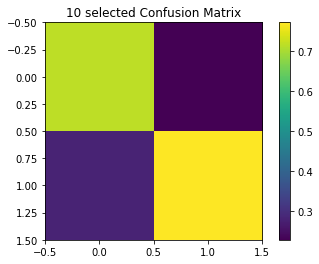

----------------------------------------------------
----------------15 Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         1.5386        |
|    Accuracy   |   0.7460826070310019  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.7496809636222745 | 0.7437224468129225 |
|     Recall     | 0.6659448818897638 | 0.813332605387256  |
|  Specificity   | 0.813332605387256  | 0.6659448818897638 |
|    F1-score    | 0.7052776817698974 | 0.7769410380393423 |
+----------------+--------------------+--------------------+
+--------+--------+--------+
|        | Female |  Male  |
+--------+--------+--------+
| Female | 6766.0 | 2260.0 |
|  Male  | 3394.0 | 9847.0 |
+--------

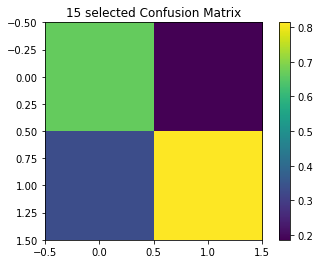

----------------------------------------------------
----------------25 Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         2.2757        |
|    Accuracy   |   0.7504820333041192  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.7449055341965226 | 0.7537228432515161 |
|     Recall     | 0.6285277161391699 | 0.8406775571617272 |
|  Specificity   | 0.8406775571617272 | 0.6285277161391699 |
|    F1-score    | 0.6816978114148399 | 0.7947957157064796 |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 6098.0 |  2090.0 |
|  Male  | 3604.0 | 11028.0 |
+---

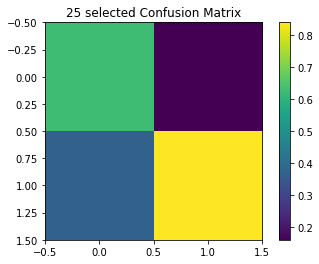

----------------------------------------------------
---------------All Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         3.1275        |
|    Accuracy   |   0.740552164138137   |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.733703825875062  | 0.7443754788153283 |
|     Recall     | 0.6130612489589155 | 0.8350345945411485 |
|  Specificity   | 0.8350345945411485 | 0.6130612489589155 |
|    F1-score    | 0.6679534454041687 | 0.7870937672459372 |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 5924.0 |  2151.0 |
|  Male  | 3739.0 | 10888.0 |
+---

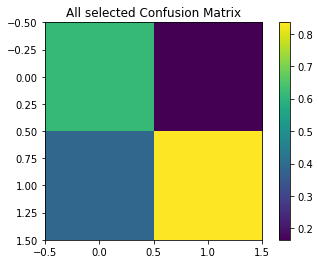

In [7]:
tables, xgboost_metrics_10 = trainer10.train_model(model_name='XGBoost')
table1, table2, conf_mat, conf_mat_norm_10 = tables
print('----------------10 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm_10, '10 selected')

print('----------------------------------------------------')

tables, xgboost_metrics_15 = trainer15.train_model(model_name='XGBoost')
table1, table2, conf_mat, conf_mat_norm_15 = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm_15, '15 selected')

print('----------------------------------------------------')

tables, xgboost_metrics_25 = trainer25.train_model(model_name='XGBoost')
table1, table2, conf_mat, conf_mat_norm_25 = tables
print('----------------25 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm_25, '25 selected')

print('----------------------------------------------------')

tables, xgboost_metrics_all = trainerAll.train_model(model_name='XGBoost')
table1, table2, conf_mat, conf_mat_norm_all = tables
print('---------------All Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm_all, 'All selected')

----------------10 Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.3844        |
|    Accuracy   |   0.7234569622441693  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.7292184503599815 | 0.7183002003681683 |
|     Recall     | 0.7015246636771301 | 0.7449289528785309 |
|  Specificity   | 0.7449289528785309 | 0.7015246636771301 |
|    F1-score    | 0.7150682754942503 | 0.7313421715379697 |
+----------------+--------------------+--------------------+
+--------+--------+--------+
|        | Female |  Male  |
+--------+--------+--------+
| Female | 7822.0 | 2905.0 |
|  Male  | 3328.0 | 8484.0 |
+--------+--------+--------+


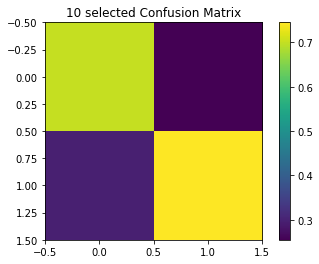

----------------------------------------------------
----------------15 Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.4718        |
|    Accuracy   |   0.7217416852957517  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.7119975248182209 | 0.7288736372444036 |
|     Recall     | 0.6552165354330709 | 0.7775686373531882 |
|  Specificity   | 0.7775686373531882 | 0.6552165354330709 |
|    F1-score    | 0.6823730950030363 | 0.752402395590682  |
+----------------+--------------------+--------------------+
+--------+--------+--------+
|        | Female |  Male  |
+--------+--------+--------+
| Female | 6657.0 | 2693.0 |
|  Male  | 3503.0 | 9414.0 |
+--------

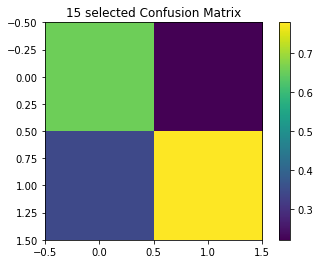

----------------------------------------------------
----------------25 Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   0.6587000000000001  |
|    Accuracy   |   0.7316827344434707  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.7124648372746403 | 0.7431210159315824 |
|     Recall     | 0.6190465775531655 | 0.8149876281371509 |
|  Specificity   | 0.8149876281371509 | 0.6190465775531655 |
|    F1-score    | 0.6623635954465916 | 0.7773505509340755 |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 6006.0 |  2427.0 |
|  Male  | 3696.0 | 10691.0 |
+---

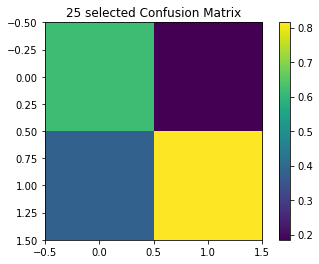

----------------------------------------------------
---------------All Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.883         |
|    Accuracy   |   0.7189683754366976  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.6979111944318914 | 0.7311569569415294 |
|     Recall     | 0.5992977362699948 | 0.8076540569426853 |
|  Specificity   | 0.8076540569426853 | 0.5992977362699948 |
|    F1-score    | 0.6448256403025929 | 0.7674922507287743 |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 5791.0 |  2508.0 |
|  Male  | 3872.0 | 10531.0 |
+---

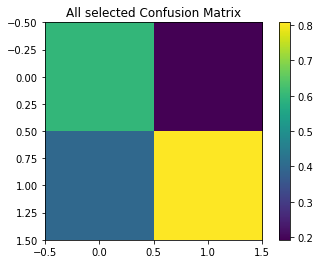

In [8]:
tables, adaboost_metrics_10 = trainer10.train_model(model_name='AdaBoost')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------10 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '10 selected')

print('----------------------------------------------------')

tables, adaboost_metrics_15 = trainer15.train_model(model_name='AdaBoost')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')

print('----------------------------------------------------')

tables, adaboost_metrics_25 = trainer25.train_model(model_name='AdaBoost')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------25 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '25 selected')

print('----------------------------------------------------')

tables, adaboost_metrics_all = trainerAll.train_model(model_name='AdaBoost')
table1, table2, conf_mat, conf_mat_norm = tables
print('---------------All Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'All selected')

----------------10 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         1.1086        |
|    Accuracy   |   0.9368651715882323  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.9384708024655838 | 0.9353596867090689 |
|     Recall     | 0.9336322869955156 | 0.9400296408991947 |
|  Specificity   | 0.9400296408991947 | 0.9336322869955156 |
|    F1-score    | 0.9360313272502069 | 0.9376757511810011 |
+----------------+--------------------+--------------------+
+--------+---------+---------+
|        |  Female |   Male  |
+--------+---------+---------+
| Female | 10410.0 |  683.0  |
|  Male  |  740.0  | 10706.0 |
+--------+---------+---------+


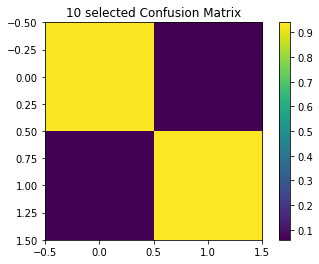

----------------------------------------------------
----------------15 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   1.3227999999999998  |
|    Accuracy   |   0.8971126632995124  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.9017335200188434 | 0.8936366179024343 |
|     Recall     | 0.8693897637795274 | 0.9203784864636153 |
|  Specificity   | 0.9203784864636153 | 0.8693897637795274 |
|    F1-score    | 0.8852051617082404 | 0.9067726090237365 |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 8833.0 |  964.0  |
|  Male  | 1327.0 | 11143.0 |
+---

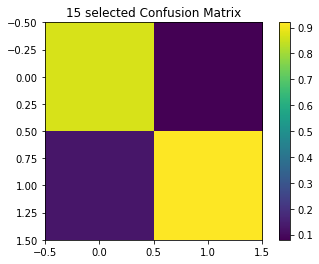

----------------------------------------------------
----------------25 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         1.7692        |
|    Accuracy   |   0.8522787028921999  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.853573698040894  | 0.8515198629509635 |
|     Recall     | 0.7877761262169938 | 0.8999851165559709 |
|  Specificity   | 0.8999851165559709 | 0.7877761262169938 |
|    F1-score    | 0.8193155009669276 | 0.875063670993747  |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 7643.0 |  1312.0 |
|  Male  | 2059.0 | 11806.0 |
+---

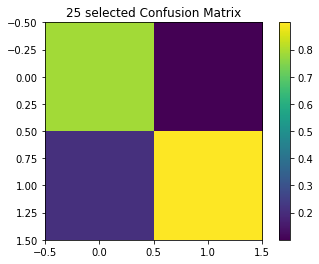

----------------------------------------------------
---------------All Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   1.9532999999999998  |
|    Accuracy   |   0.8361383814694763  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.8424629623438777 | 0.8323330303078663 |
|     Recall     | 0.7565980674901137 | 0.8950833729618765 |
|  Specificity   | 0.8950833729618765 | 0.7565980674901137 |
|    F1-score    | 0.7971570984777192 | 0.8625401045517396 |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 7311.0 |  1368.0 |
|  Male  | 2352.0 | 11671.0 |
+---

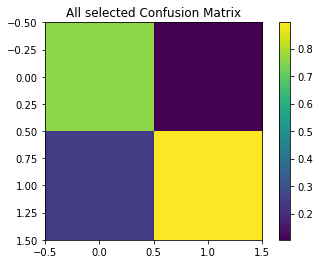

In [9]:
tables, xtrees_metrics_10 = trainer10.train_model(model_name='XTrees')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------10 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '10 selected')

print('----------------------------------------------------')

tables, xtrees_metrics_15 = trainer15.train_model(model_name='XTrees')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')

print('----------------------------------------------------')

tables, xtrees_metrics_25 = trainer25.train_model(model_name='XTrees')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------25 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '25 selected')

print('----------------------------------------------------')

tables, xtrees_metrics_all = trainerAll.train_model(model_name='XTrees')
table1, table2, conf_mat, conf_mat_norm = tables
print('---------------All Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'All selected')

----------------10 Selected Features----------------
+---------------+-----------------------+
|      KNN      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.3739        |
|    Accuracy   |   0.815386799657048   |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.8193331302163497 | 0.8118076723635204 |
|     Recall     | 0.8043049327354259 | 0.826236053270297  |
|  Specificity   | 0.826236053270297  | 0.8043049327354259 |
|    F1-score    | 0.8116978819627738 | 0.818912689227272  |
+----------------+--------------------+--------------------+
+--------+--------+--------+
|        | Female |  Male  |
+--------+--------+--------+
| Female | 8968.0 | 1979.0 |
|  Male  | 2182.0 | 9410.0 |
+--------+--------+--------+


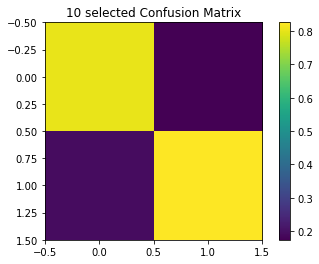

----------------------------------------------------
----------------15 Selected Features----------------
+---------------+-----------------------+
|      KNN      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.492         |
|    Accuracy   |   0.8122336706539162  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.8222805979241707 | 0.8051006810872412 |
|     Recall     | 0.7507874015748032 | 0.8637989913397165 |
|  Specificity   | 0.8637989913397165 | 0.7507874015748032 |
|    F1-score    | 0.7848875808111877 | 0.8334057724422754 |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 7628.0 |  1649.0 |
|  Male  | 2532.0 | 10458.0 |
+---

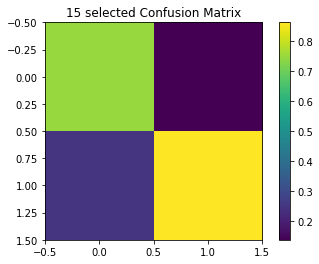

----------------------------------------------------
----------------25 Selected Features----------------
+---------------+-----------------------+
|      KNN      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.5493        |
|    Accuracy   |   0.8061349693251534  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.8181750340413674 | 0.7993308575385224 |
|     Recall     | 0.6995481329695182 | 0.8849677796692156 |
|  Specificity   | 0.8849677796692156 | 0.6995481329695182 |
|    F1-score    | 0.7541737536281683 | 0.839953139018849  |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 6787.0 |  1509.0 |
|  Male  | 2915.0 | 11609.0 |
+---

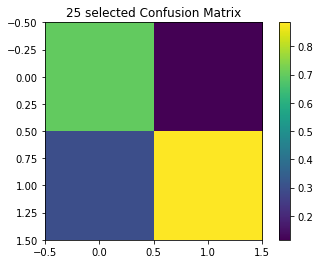

----------------------------------------------------
---------------All Selected Features----------------
+---------------+-----------------------+
|      KNN      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   0.5469999999999999  |
|    Accuracy   |   0.7957893532124062  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.8101267688876643 | 0.7879121652641407 |
|     Recall     | 0.6796044842108417 | 0.8818928357871642 |
|  Specificity   | 0.8818928357871642 | 0.6796044842108417 |
|    F1-score    | 0.7390827761241864 | 0.8322350248991365 |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 6567.0 |  1540.0 |
|  Male  | 3096.0 | 11499.0 |
+---

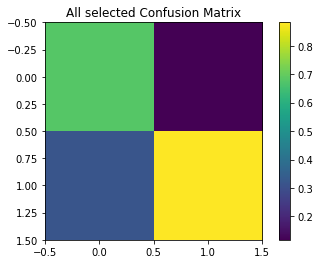

In [10]:
tables, knn_metrics_10 = trainer10.train_model(model_name='KNN')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------10 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '10 selected')

print('----------------------------------------------------')

tables, knn_metrics_15 = trainer15.train_model(model_name='KNN')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')

print('----------------------------------------------------')

tables, knn_metrics_25 = trainer25.train_model(model_name='KNN')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------25 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '25 selected')

print('----------------------------------------------------')

tables, knn_metrics_all = trainerAll.train_model(model_name='KNN')
table1, table2, conf_mat, conf_mat_norm = tables
print('---------------All Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'All selected')

----------------10 Selected Features----------------
+---------------+-----------------------+
|       DT      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |  0.016000000000000004 |
|    Accuracy   |   0.6845021584156153  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.7243245694668816 | 0.6581538134490952 |
|     Recall     | 0.5850224215246638 | 0.7818960608926833 |
|  Specificity   | 0.7818960608926833 | 0.5850224215246638 |
|    F1-score    | 0.6471362090150912 | 0.7146460590993454 |
+----------------+--------------------+--------------------+
+--------+--------+--------+
|        | Female |  Male  |
+--------+--------+--------+
| Female | 6523.0 | 2484.0 |
|  Male  | 4627.0 | 8905.0 |
+--------+--------+--------+


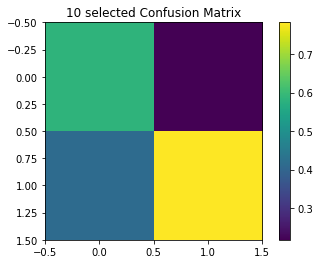

----------------------------------------------------
----------------15 Selected Features----------------
+---------------+-----------------------+
|       DT      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.0252        |
|    Accuracy   |   0.6972654076753848  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.7363861979044672 | 0.6788101295857663 |
|     Recall     | 0.5250000000000001 | 0.8418259617418841 |
|  Specificity   | 0.8418259617418841 | 0.5250000000000001 |
|    F1-score    | 0.6125362050269242 | 0.7514505020465223 |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 5334.0 |  1915.0 |
|  Male  | 4826.0 | 10192.0 |
+---

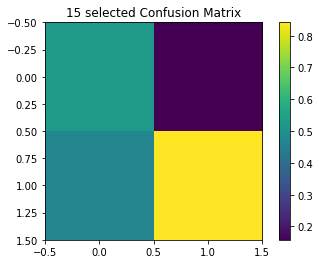

----------------------------------------------------
----------------25 Selected Features----------------
+---------------+-----------------------+
|       DT      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |  0.03570000000000001  |
|    Accuracy   |   0.7046450482033303  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.7113688629829684 | 0.702695709713411  |
|     Recall     | 0.5166933865607779 | 0.8436483739837397 |
|  Specificity   | 0.8436483739837397 | 0.5166933865607779 |
|    F1-score    | 0.5974397406202964 | 0.7664664513710892 |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 5013.0 |  2051.0 |
|  Male  | 4689.0 | 11067.0 |
+---

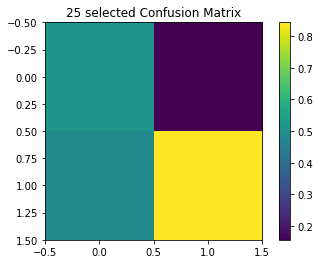

----------------------------------------------------
---------------All Selected Features----------------
+---------------+-----------------------+
|       DT      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |  0.047099999999999996 |
|    Accuracy   |   0.6864599615531592  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.6831207676190805 | 0.6895121279331269 |
|     Recall     | 0.4963146141510424 | 0.8273648823620808 |
|  Specificity   | 0.8273648823620808 | 0.4963146141510424 |
|    F1-score    | 0.5731622647904783 | 0.7516981112432081 |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 4796.0 |  2251.0 |
|  Male  | 4867.0 | 10788.0 |
+---

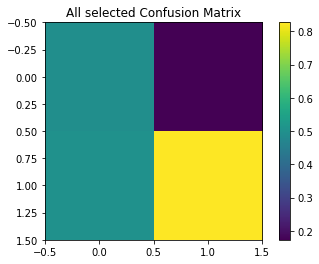

In [11]:
tables, dt_metrics_10 = trainer10.train_model(model_name='DT')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------10 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '10 selected')

print('----------------------------------------------------')

tables, dt_metrics_15 = trainer15.train_model(model_name='DT')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')

print('----------------------------------------------------')

tables, dt_metrics_25 = trainer25.train_model(model_name='DT')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------25 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '25 selected')

print('----------------------------------------------------')

tables, dt_metrics_all = trainerAll.train_model(model_name='DT')
table1, table2, conf_mat, conf_mat_norm = tables
print('---------------All Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'All selected')